In [33]:
from Scripts import ScriptOptions 
import os

params= ScriptOptions(
    ImageFolder= r"./Tests/Wide_shot/",
    model='big', #Ещё есть convnext, swinv2, big, vit
    gen_threshold=0.35, #увереность для общей картинки/и если не установлено значение в конфиге yolo моделей то для них тоже
    char_threshold=0.75, # Увереность для персонажей, теги персонажей берутся только из полной области, по причине я так захотел
    batch=2,
    recursive=False,
    save_txt=False,
    append_txt=False,
    add_tags_before="",
    add_tags_after="",
    remove_tags=""
    
)



In [35]:
from Scripts import BatchTagging
result=BatchTagging(params)

Файл config.json уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл selected_tags.csv уже существует в models\taggers\wd-eva02-large-tagger-v3
Загрузка модели тегирования 'big' из 'SmilingWolf/wd-eva02-large-tagger-v3'...
Loading model from models\taggers\wd-eva02-large-tagger-v3\model.safetensors using safetensors
Загрузка списка тегов...
Загрузка тегов из локального файла: models\taggers\wd-eva02-large-tagger-v3\selected_tags.csv
Создание трансформации данных...
Загрузка конфигурации детекторов из detectors.json...
Загрузка модели YOLO person_yolov8s-seg.pt...
Loading YOLO model from local directory: models\yolo\person_yolov8s-seg.pt
Загрузка модели YOLO face_yolov9c.pt...
Loading YOLO model from local directory: models\yolo\face_yolov9c.pt
Всего изображений для обработки: 38

Обработка изображения 1/38: C:\Users\liali\YoloWdTagger\wdv3-timm\Tests\Wide_shot\0SxBXLP.png

image 1/1 C:\Users\liali\YoloWdTagger\wdv3-timm\Tests\Wide_shot\0SxBXLP.png: 384x640 1 person, 14.6ms
Sp

In [36]:
# result[0][x] - теги по областям, для общей области, путь до изображения, какие детекторы и box для них Для Изображения X
# result[1][x] - обьедененые теги + путь до изображения X
print(result[1][0].keys())
print()
print(result[0][0].keys())
print()
print(result[1][0]['merged_tags'].keys())

dict_keys(['image_path', 'merged_tags'])

dict_keys(['image_path', 'full_image', 'detectors'])

dict_keys(['caption', 'taglist', 'general', 'character', 'ratings'])


In [37]:
print(result[1][3]['merged_tags']['caption'])
print()
print(result[1][3]['merged_tags']['taglist'])

1boy, 1girl, 2girls, bare_tree, black_hair, blue_theme, brown_hair, chair, dark, desk, dress, glass, indoors, long_hair, monochrome, multiple_girls, ponytail, purple_hair, purple_theme, ruins, sandals, school_uniform, serafuku, shirt, shoes, short_hair, silhouette, sitting, skirt, standing, tree, water, white_dress

1boy, 1girl, 2girls, bare tree, black hair, blue theme, brown hair, chair, dark, desk, dress, glass, indoors, long hair, monochrome, multiple girls, ponytail, purple hair, purple theme, ruins, sandals, school uniform, serafuku, shirt, shoes, short hair, silhouette, sitting, skirt, standing, tree, water, white dress


In [38]:
print(result[0][1]['full_image']['taglist'])
print()
print(result[1][1]['merged_tags']['taglist'])

1girl, blood, solo, school desk, desk, tree, classroom, upside-down, chair, dark, falling, wings, school chair, hat, short sleeves, blood splatter, flandre scarlet

1girl, blood, blood on clothes, blood splatter, chair, classroom, dark, desk, falling, hat, school chair, school desk, short sleeves, shorts, solo, tree, upside-down, wings


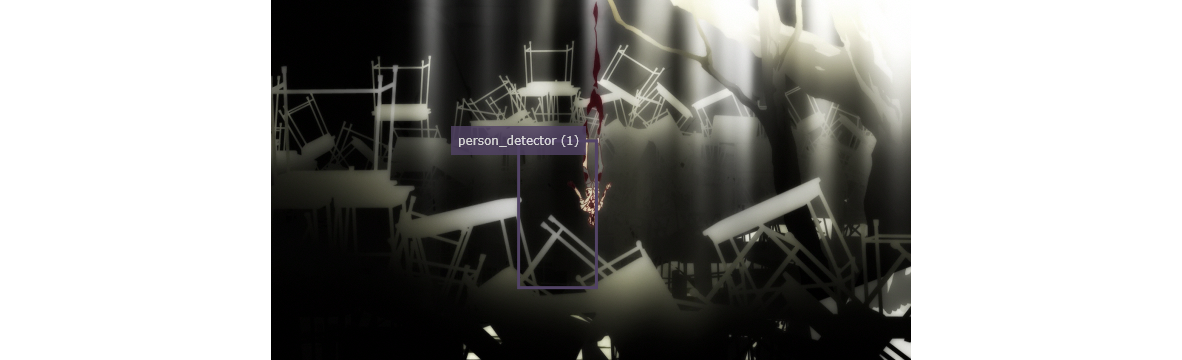

Информация о изображении #2: C:\Users\liali\YoloWdTagger\wdv3-timm\Tests\Wide_shot\3io4hqa.png

Объединенные теги:
1girl, blood, blood on clothes, blood splatter, chair, classroom, dark, desk, falling, hat, school chair, school desk, short sleeves, shorts, solo, tree, upside-down, wings

Теги без включения yolo моделей:
1girl, blood, solo, school desk, desk, tree, classroom, upside-down, chair, dark, falling, wings, school chair, hat, short sleeves, blood splatter, flandre scarlet

Разница тегов (присутствуют в объединенных, но отсутствуют в тегах без yolo):
blood on clothes, shorts


In [39]:
from Scripts import view_image_results
view_image_results(result, 1, visualize=True, save_visualization=False, verbose=True)

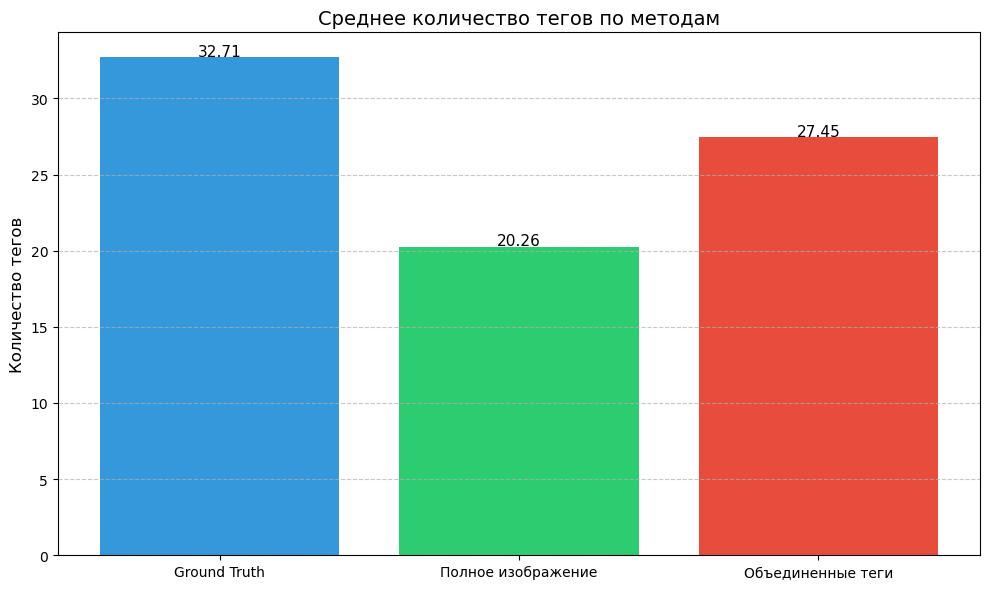

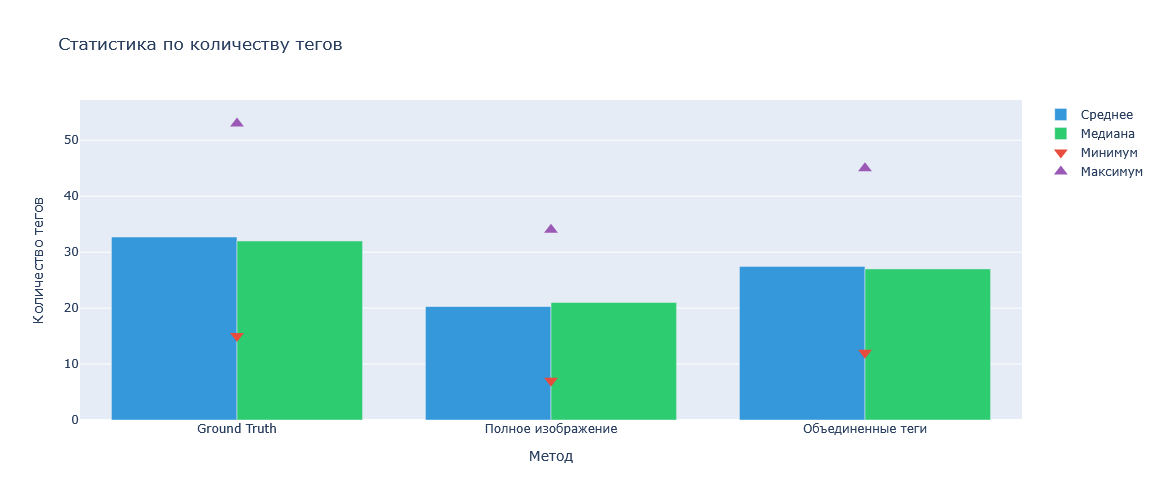

Error analysis saved to full_image_errors.csv
Error analysis saved to merged_tags_errors.csv
Tag performance analysis saved to full_image_tag_performance.csv
Tag performance analysis saved to merged_tags_tag_performance.csv


In [40]:
from Scripts import compare_tagging_methods
data=compare_tagging_methods(
    image_folder=  r"./Tests/Wide_shot",
    txt_folder=  r"./Tests/Wide_shot",
    results=result,
    model_labels_path="./models/taggers/wd-eva02-large-tagger-v3/selected_tags.csv",
    filter_tags=True,
    num_worst_examples=5,
    visualize=True,
    interactive=True
)

In [41]:
data[1]

{'Полное изображение':       image                                  ground_truth_tags  \
 36  yJMAejs  1girl, 2boys, black jacket, black skirt, crack...   
 10  nm5NTBi  2boys, arm support, balancing, black hair, bla...   
 31  9YuXXFR  1girl, 2boys, :|, ahoge, all fours, araragi ko...   
 7   K4rhp8s  2boys, backlighting, black hair, black pants, ...   
 22  GQ5gbEr  1boy, 1girl, arms behind back, bandaged arm, b...   
 0   FhtbAWx  2girls, bare tree, black hair, black pants, ce...   
 16  W4Bc0Xc  2boys, balancing, black hair, black jacket, bl...   
 35  Lccnc90  2girls, adjusting hair, arm support, arms behi...   
 25  TbIZHth  1boy, ahoge, araragi koyomi, black eyes, black...   
 33  OS0eGXs  1girl, backlighting, black hair, from side, in...   
 29  BKCAd4A  1girl, black hair, black skirt, bottle, can, c...   
 21  Dms3OSa  1boy, 1girl, araragi koyomi, bare shoulders, b...   
 26  wvz6Z6L  1boy, 1girl, aged up, ahoge, araragi koyomi, b...   
 2   cAu6XsB  1boy, backlighting, black 